In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os

NAME="result-21899"

RESULTDIR="/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/"+NAME

result=[]


for root, dirs, files in os.walk(RESULTDIR):
    for name in files:
        print(name)
        path = os.path.join(root, name)
        print(path)
        ns = name.split("-")
        if ns[1]=='4':
            n = int(ns[0])
            lines = open(path).readlines()
            print(lines)
            if len(lines)<4:
                print("lines < 4")
            else:
                P = float(lines[1].split()[-1])
                F = float(lines[3].split()[-1])
                result.append((n,P,F))


print(result)

# for i in range(1,51):
#     for j in range(1,24):
#         f=open(RESULTDIR+"/%d-3-%d.txt"%(i,j))
#         s=str(f.read())
#         mat = re.match("\((\d+), (\d+)\)",s)
#         if not mat:
#             print(s)
#             print(f.name)
#             print("error match")
#         else:
#             a=int(mat[1])
#             b=int(mat[2])
#             result.append([j,a,b])
# print(result)


19-4-2.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/19-4-2.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 544\n', 'FRIEND-based LB Index: 0.76975234365874\n']
13-4-38.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/13-4-38.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 597\n', 'FRIEND-based LB Index: 0.76975234365874\n']
6-4-29.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/6-4-29.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 597\n', 'FRIEND-based LB Index: 0.76975234365874\n']
15-4-41.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/15-4-41.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 597\n', 'FRIEND-based LB Index: 0.76975234365874\n']
9-4-2.txt
/home/pcl/8LStudentYuHaitao/tmp/sf

['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 291\n', 'FRIEND-based LB Index: 0.7451213964215646\n']
21-4-33.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/21-4-33.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 597\n', 'FRIEND-based LB Index: 0.76975234365874\n']
15-4-27.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/15-4-27.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 544\n', 'FRIEND-based LB Index: 0.76975234365874\n']
15-4-10.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/15-4-10.txt
['FRIEND Customer: 21899\n', 'Prefix-based LB Index: 0.7693858591101512\n', 'msg overhead: 151\n', 'FRIEND-based LB Index: 0.7443084086348035\n']
12-4-9.txt
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-21899/12-4-9.txt
['FRIEND Customer: 21899\n', 'Prefix-b

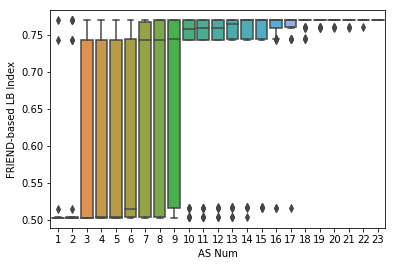

In [52]:
c0="AS Num"
c1="Prefix-based LB Index"
c2="FRIEND-based LB Index"
df = pd.DataFrame(result, columns=[c0,c1,c2], dtype=float)
df[c0]=df[c0].astype(int)
sns.boxplot(x=c0,y=c1,data=df)
# plt.show()
plt.savefig("result/%s-prefix.pdf"%NAME,dpi=300, bbox_inches='tight')


plt.clf()
sns.boxplot(x=c0,y=c2,data=df)
# plt.show()
plt.savefig("result/%s-friend.pdf"%NAME,dpi=300, bbox_inches='tight')